In [1]:
# Getting the data ready 
import pandas as pd
heart_disease = pd.read_csv("heart_disease_uci.csv")
heart_disease

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [2]:
heart_disease.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [4]:
x = heart_disease.drop("num", axis=1)
y = heart_disease["num"]

In [37]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

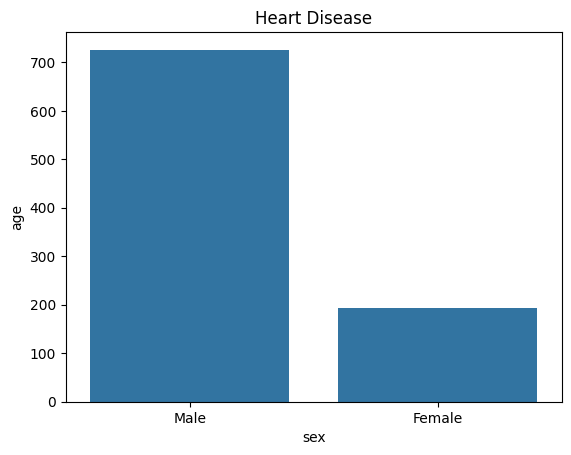

In [11]:
# 3. Visualize the model
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', data = heart_disease)
plt.title('Heart Disease')
plt.xlabel('sex')
plt.ylabel('age')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["sex"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.0, 1.0, 1, ..., 'downsloping', 0.0, 'fixed defect'],
       [0.0, 1.0, 2, ..., 'flat', 3.0, 'normal'],
       [0.0, 1.0, 3, ..., 'flat', 2.0, 'reversable defect'],
       ...,
       [0.0, 1.0, 918, ..., nan, nan, 'fixed defect'],
       [0.0, 1.0, 919, ..., nan, nan, nan],
       [0.0, 1.0, 920, ..., nan, nan, nan]], dtype=object)

In [33]:
clf.fit(x_train, y_train);
x_train

ValueError: could not convert string to float: 'Male'

In [34]:
y_preds = clf.predict(x_test)
y_preds


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [35]:
clf.score(x_test, y_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'